In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

In [3]:
# Define the kernel function with RBF kernel
# This basically dictates how close a set of points a are from a set of points b
# using our defined param value
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

In [4]:
# Use kernel function to get covariance matrix
param = 0.1
K_ss = kernel(Xtest, Xtest, param)
K_ss.shape

(50, 50)

In [5]:
# Get cholesky decomposition (square root) of the covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
# this gives us 3 lists of possible points where the function passes through
f_prior = np.dot(L, np.random.normal(size=(n,3)))

In [6]:
# Get noiseless observed data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points to get the std dev of training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

In [7]:
# Do some math to compute the the link between our testing points and the training points

# Compute the mean at our test points using the std dev of the training points
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)


In [8]:
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

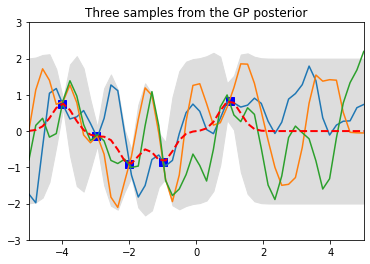

In [9]:
# plot
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()